#🔍 **Análise Exploratória**


In [ ]:
#importando as bibliotecas 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statistics import mode

In [ ]:
#importando o conjunto de dados
data = pd.read_csv('data_concatenado.csv', sep= ';')
data.head(3)

,Unnamed: 0,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DATA,VALOR_REEMBOLSADO
0,0,2022,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",004.948.028-63,GILBERTO PISELO DO NASCIMENTO,03/01/2022,6000.0
1,1,2022,1,ACIR GURGACZ,Divulgação da atividade parlamentar,26.320.603/0001-64,INFORMANAHORA,04/01/2022,1500.0
2,2,2022,1,ACIR GURGACZ,Divulgação da atividade parlamentar,13.659.201/0001-47,LINHA PURPURA FOTO E VIDEO LTDA,14/01/2022,6000.0


#📉 **Estatística** **Descritiva**




Vamos analisar o tipo de despesa mais comum dos senadores entre os anos  2019- 2022 para isso é necessário calcular a moda da coluna intitulada como TIPO_DESPESA.

A moda é muito utilizada em atributos nominais como é o caso da coluna TIPO_DESPESA



**Medidas de Posição** 

In [ ]:
data.describe()

,Unnamed: 0,ANO,MES,VALOR_REEMBOLSADO
count,69246.000000,69246.000000,69246.000000,69246.000000
mean,8869.535887,2020.412775,6.584308,1413.093847
std,5372.547298,1.161658,3.368561,3099.397293
min,0.000000,2019.000000,1.000000,0.010000
25%,4327.250000,2019.000000,4.000000,158.000000
50%,8655.000000,2020.000000,7.000000,425.455000
75%,12983.000000,2021.000000,10.000000,1570.855000
max,21633.000000,2022.000000,12.000000,120000.000000


**Moda**

In [ ]:
moda = data['TIPO_DESPESA'].mode()
moda

0    Locomoção, hospedagem, alimentação, combustíve...
Name: TIPO_DESPESA, dtype: object

**Média e mediana**

A mediana e mediana são medidas de tendência central calculada geralmente em atributos quantitativos

In [ ]:
media = data['VALOR_REEMBOLSADO'].mean()
mediana= data['VALOR_REEMBOLSADO'].median()

print('A média das despesa entre os anos de 2019 a 2022 dos senadores é:', media)
print('A mediana das despesas entre os anos de 2019 a 2022 dos senadores é', mediana)

A média das despesa entre os anos de 2019 a 2022 dos senadores é: 1413.0938472980386
A mediana das despesas entre os anos de 2019 a 2022 dos senadores é 425.45500000000004


**Medidas de Dispersão**

**Desvio Padrão**

In [ ]:
desvio_padrao = data['VALOR_REEMBOLSADO'].std()
desvio_padrao

3099.3972927038953

In [ ]:
variancia = data['VALOR_REEMBOLSADO'].var()
variancia

9606263.578020236

#**Outros** **Tipos** **de** **Análises**


In [ ]:
#Analisando os senadores que mais declararam  despesas

data_group = data.groupby('SENADOR').agg( {'VALOR_REEMBOLSADO': 'sum'}).reset_index()
data_group = data_group.sort_values('VALOR_REEMBOLSADO',ascending= False).head(10)
data_group

,SENADOR,VALOR_REEMBOLSADO
136,TELMÁRIO MOTA,1951401.21
125,ROGÉRIO CARVALHO,1928300.49
98,MECIAS DE JESUS,1913241.64
110,PAULO ROCHA,1885315.28
86,MAILZA GOMES,1793120.58
122,ROBERTO ROCHA,1727057.62
149,ZEQUINHA MARINHO,1698140.72
37,ELIZIANE GAMA,1694229.21
32,EDUARDO BRAGA,1683525.68
145,WELLINGTON FAGUNDES,1671934.35


<Axes: xlabel='VALOR_REEMBOLSADO', ylabel='SENADOR'>

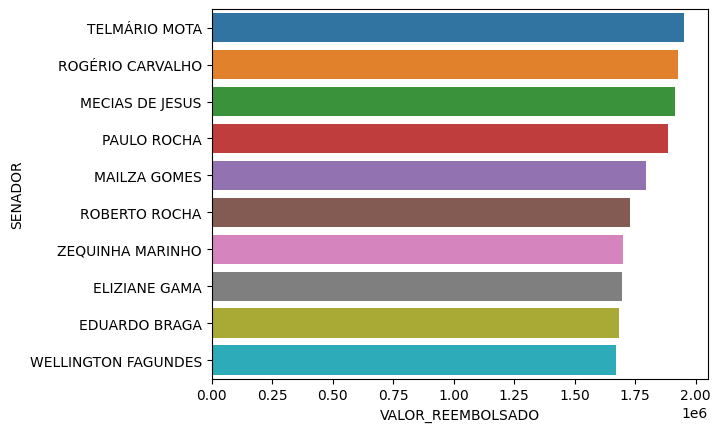

In [ ]:
# plotando os resultados do groupby
sns.barplot(data = data_group, x = 'VALOR_REEMBOLSADO', y ='SENADOR' , orient ='h')

In [ ]:
#Avaliando a soma de gastos por ano
data_group1 = data.groupby('ANO').agg( {'VALOR_REEMBOLSADO': 'sum'}).reset_index()
data_group1 = data_group1.sort_values('VALOR_REEMBOLSADO',ascending= False).head(10)
data_group1

,ANO,VALOR_REEMBOLSADO
3,2022,27167606.71
0,2019,25248242.40
2,2021,25020323.84
1,2020,20414923.60


<Axes: xlabel='ANO', ylabel='VALOR_REEMBOLSADO'>

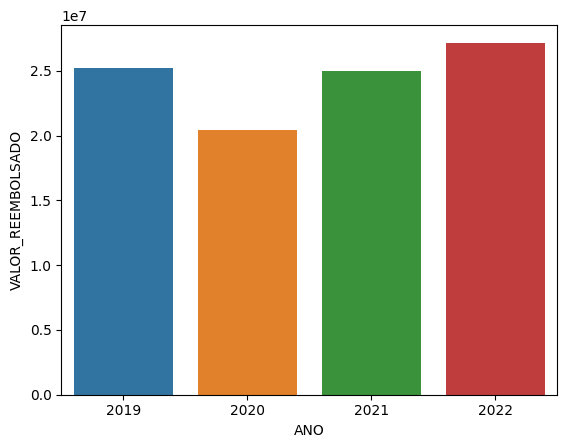

In [ ]:
sns.barplot(data = data_group1, x = 'ANO', y ='VALOR_REEMBOLSADO' , orient ='v')


Pode-se notar que o maior gasto dos senadores foi ocorrido no ano das eleições presidenciais de 2022.

Por exemplo: se você pegou o dataset do CEAPS, você consegue ver qual foi o senador que mais declarou despesas? 
Qual foi o percentual da cota que os senadores gastaram? Teve algum com mais de 90%? 
Em ano de eleições os senadores gastam mais? Dentre outras perguntas.

Analisando os  outliers da coluna valor rembolsado 
para isso vamos utilizar um box plot nesta coluna



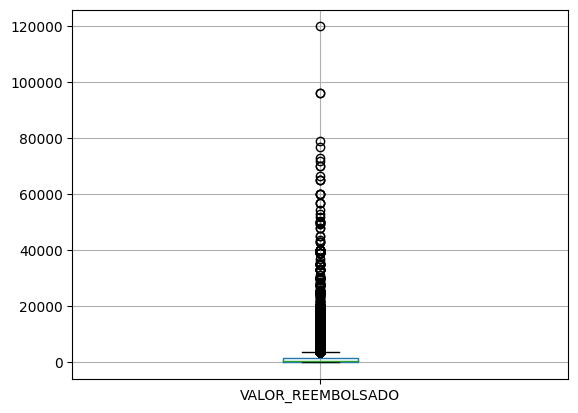

In [ ]:
boxplot= data.boxplot(column=['VALOR_REEMBOLSADO']) 

In [ ]:
Q1= data['VALOR_REEMBOLSADO'].quantile(0.25)
Q3= data['VALOR_REEMBOLSADO'].quantile(0.75)
IQR = Q3-Q1

desvio_padrao = data['VALOR_REEMBOLSADO'].std()
Q1= data['VALOR_REEMBOLSADO'].quantile(0.25)
Q3= data['VALOR_REEMBOLSADO'].quantile(0.75)
IQR = Q3-Q1

desvio_padrao = data['VALOR_REEMBOLSADO'].std()

Removendo os outliers segundo o IQR

In [ ]:
#pontos considerados outliers segundo o IQR
data_iqr = data[(data['VALOR_REEMBOLSADO'] < Q1-(IQR*1.5)) 
                    |(data['VALOR_REEMBOLSADO'] > Q3+(IQR*1.5))]

In [ ]:
 #apenas inliers segundo IQR
dc_iqr = data[(data['VALOR_REEMBOLSADO'] >= Q1-(IQR*1.5)) 
            & (data['VALOR_REEMBOLSADO'] <= Q3+(IQR*1.5))]

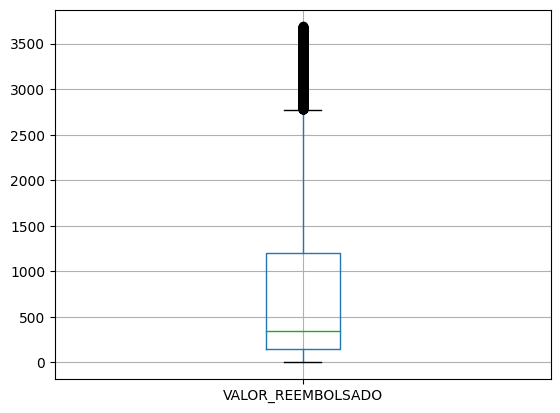

In [ ]:
boxplot= dc_iqr.boxplot(column=['VALOR_REEMBOLSADO']) 

Plotando os dados originais ao lado dos dados sem outliers

<Axes: >

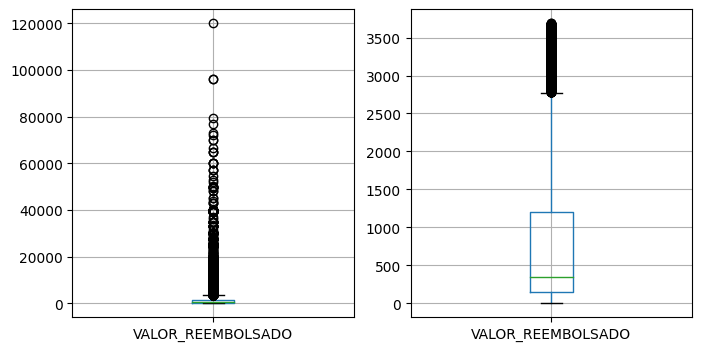

In [ ]:
plt.figure(figsize=(8,4))
plt.subplot(121); data.boxplot(['VALOR_REEMBOLSADO'])
plt.subplot(122); dc_iqr.boxplot(['VALOR_REEMBOLSADO'])